09.1


In [2]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

x0=15
mu=6.3
sigma=np.sqrt(15)

Z = abs(x0 - mu) / sigma
print("Z score =", Z)

Z score = 2.2463303408003017


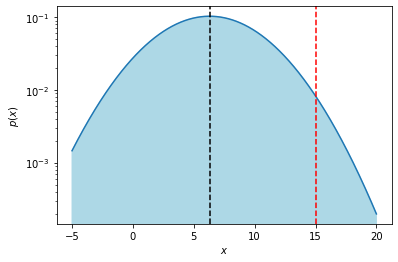

In [3]:
w = mu - x0
x = np.linspace(-5,20, 1000)
y = stats.norm.pdf(x, loc=mu, scale=sigma)
plt.plot(x, y)
plt.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='k')
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.yscale("log")
# plt.xlim(-50,50)
# plt.ylim(10e-8,1)
plt.show()

In [4]:
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
print("p-value =", pvalue)

p-value = 0.02468285653931758


09.2

T value : -5.355623844793182


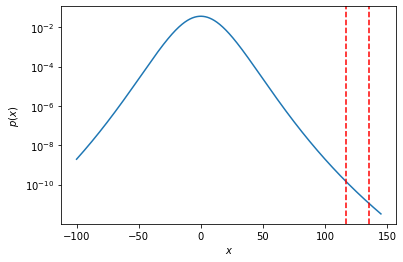

In [8]:
s1 = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
s2 = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])


sigma1= np.sqrt(np.var(s1, ddof=1))
sigma2=np.sqrt(np.var(s2, ddof=1))
sample_mean1 = np.mean(s1)
sample_mean2 = np.mean(s2)
sigma=np.sqrt((sigma1**2+sigma2**2)/2)
n = len(s1)+len(s2) 


# calculate the test statistics
T = (sample_mean1 - sample_mean2) / (sigma * np.sqrt(2/n))
print("T value :", T)

# plot the
x = np.linspace(-100, 145, 1000)
y = stats.t.pdf(x, scale=sigma, df=n - 1)
plt.plot(x, y)
plt.axvline(sample_mean1, linestyle='--', color='red')
plt.axvline(sample_mean2, linestyle='--', color='red')


plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.yscale("log")



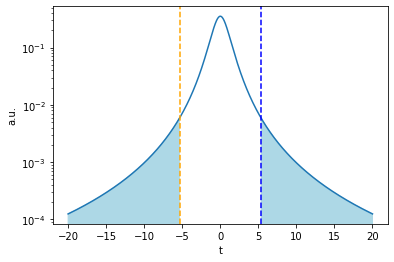

p-value : 3.615052444343338e-05


In [12]:
xs = np.linspace(-20, +20, 1000)
ts = stats.t.pdf(xs,2)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.yscale("log")


plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value :", pvalue)

09.3

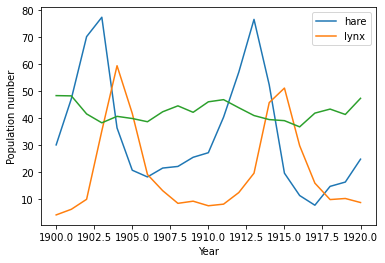

In [40]:
import numpy as np
from scipy import fftpack

# downloading the data from this link: https://github.com/scipy-lectures/scipy-lecture-notes/blob/master/data/populations.txt

data = np.loadtxt('populations.txt')
years = data[:, 0]
populations = data[:, 1:]

plt.figure()
plt.plot(years, populations * 1e-3)
plt.xlabel('Year')
plt.ylabel('Population number')
plt.legend(['hare', 'lynx'], loc=1)

<ipython-input-41-872015f460f2>:3: RuntimeWarning: divide by zero encountered in true_divide
  periods = 1 / frequencies


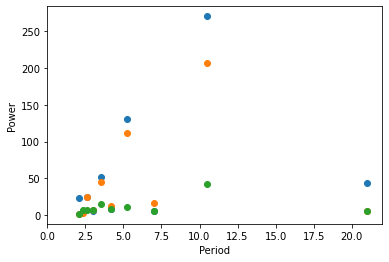

In [41]:
ft_populations = fftpack.fft(populations, axis=0)
frequencies = fftpack.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power')

plt.show()

09.4

Text(0.5, 1.0, 'Original image of moonlanding')

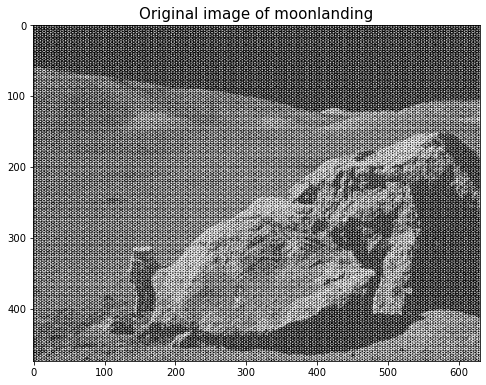

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Importing the image as a 2D numpy array & Examining the image which has periodic noise
image = plt.imread('moonlanding.png').astype(float)
plt.figure(figsize=(8, 8)) 
plt.imshow(image, plt.cm.gray )
plt.title('Original image of moonlanding',size=15)

Text(0.5, 1.0, 'Fast Fourier Trasform')

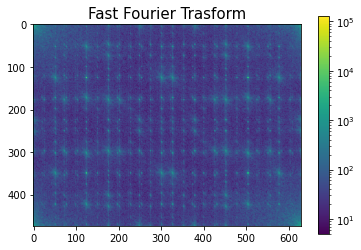

In [44]:
# Checking the documentation of the scipy.fftpack package 
from scipy import fftpack
from matplotlib.colors import LogNorm

# method to performs a 2D FFT
image_fft = fftpack.fft2(image)

def plot_spectrum(image_fft):
    # Ploting the spectrum with useing LogNorm
    plt.imshow(np.abs(image_fft), norm=LogNorm(vmin=5))
    plt.colorbar()

plt.figure()  
plot_spectrum(image_fft)
plt.title('Fast Fourier Trasform',size=15)

Text(0.5, 1.0, 'Filtered Spectrum of moonlanding image')

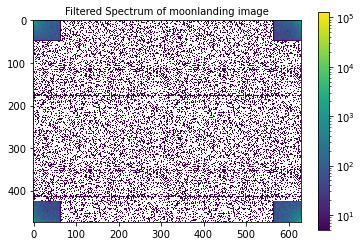

In [45]:
keep_fraction = 0.1
image_fft2 = image_fft.copy()

r, c = image_fft2.shape

image_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
image_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

plt.figure()
plot_spectrum(image_fft2)
plt.title('Filtered Spectrum of moonlanding image',size=10)

Text(0.5, 1.0, 'Reconstructed Image')

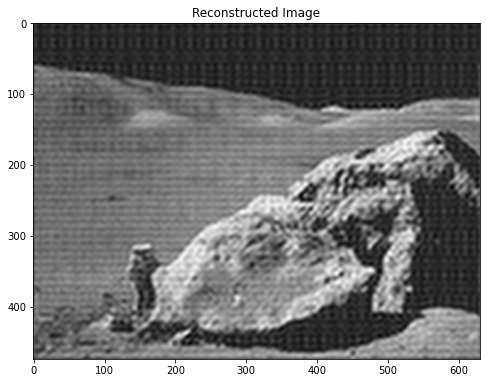

In [49]:
# Reconstruct the denoised image from the filtered spectrum, keep only the
# real part for display.
image_new = fftpack.ifft2(image_fft2).real

plt.figure(figsize=(8,8))
plt.imshow(image_new, plt.cm.gray)
plt.title('Reconstructed Image')
